# PROJECT : TCAS Data Analysis & Model Developing using *******

### GROUP : 
#### 1. Arunwat Moonbung | 6131501066
#### 2. Natthida Patlee | 6131501016
#### 3. Piya Jairat | 6131501035
#### 4. Wirakarn Keawkanya | 6131501054


## IMPORT PYTHON LIBRALIES & FILES

In [157]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

### IMPORT tcas.xlsx file

In [158]:
tcas_original_dataset = pd.read_excel('tcas.xlsx')

## Step 1 : Exploratory Data Analysis & Data preprocessing

## Basic Exploration 
### Number of Row x Columns, data types and statistic
#### 36401 Rows, 79 Columns

In [159]:
# dtypes display maximum 80 columns
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
display("Number of Row x Columns of Original tcas.xlsx", tcas_original_dataset.shape)
display("79 Columns and their data types",tcas_original_dataset.dtypes)

'Number of Row x Columns of Original tcas.xlsx'

(36401, 79)

'79 Columns and their data types'

AcademicYear             int64
AcademicSemester         int64
PrefixName              object
Sex                     object
FacultyID                int64
FacultyName             object
DepartmentCode           int64
DepartmentName          object
MajorName               object
EntryTypeID              int64
EntryTypeName           object
EntryGroupID             int64
EntryGroupName          object
TCAS                     int64
LevelID                  int64
LevelName               object
LevelNameEng            object
ApplicationDate         object
EntryGPA               float64
HomeRegion              object
StudentTH                int64
StudentType             object
Country                 object
SchoolName              object
SchoolProvince          object
ProvinceNameEng         object
SchoolRegion            object
SchoolRegionName        object
SchoolRegionNameEng     object
NationName              object
ReligionName            object
GPAX                   float64
GPA_Eng 

In [160]:
display("Statistic of numeric features", tcas_original_dataset.describe())
display("Statistic of category features", tcas_original_dataset.describe(include=['object']))

'Statistic of numeric features'

,AcademicYear,AcademicSemester,FacultyID,DepartmentCode,EntryTypeID,EntryGroupID,TCAS,LevelID,EntryGPA,StudentTH,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42
count,36401.000000,36401.0,36401.000000,36401.000000,36401.000000,36401.000000,36401.000000,36401.0,7568.000000,36401.000000,36221.000000,19127.000000,19127.000000,19127.000000,19127.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000,19117.000000
mean,2562.515013,1.0,16.895525,1697.151040,22.995467,628240.152358,2.733194,3.0,3.101413,0.991758,1.714026,3.282577,2.827364,3.005401,3.457994,0.690433,0.792959,0.621750,0.661192,0.390333,0.555474,0.086101,0.266621,0.314432,0.113930,0.073756,0.315792,0.507820,0.043260,0.030496,0.060104,0.039494,0.015117,0.670503,0.480776,0.332688,0.084114,0.213004,0.268714,0.542135,0.615473,0.600879,0.362034,0.875294,0.598734,0.435267,0.448606,0.374902,0.866820,0.096929,0.036250,0.154888,0.168332,0.968039,0.587801,0.090025,0.176649
std,0.499781,0.0,4.945143,490.492786,12.434400,5002.802707,1.259893,0.0,0.627294,0.090409,1.654008,0.565863,0.762181,0.613890,0.458381,0.462327,0.405196,0.484963,0.473317,0.487838,0.496926,0.280521,0.442204,0.464301,0.317735,0.261381,0.464843,0.499952,0.203447,0.171953,0.237685,0.194771,0.122023,0.470043,0.499643,0.471188,0.277565,0.409441,0.443302,0.498234,0.486496,0.489731,0.480601,0.330394,0.490167,0.495805,0.497365,0.484110,0.339778,0.295869,0.186918,0.361808,0.374170,0.175901,0.492243,0.286224,0.381381
min,2562.000000,1.0,10.000000,1005.000000,10.000000,623010.000000,1.000000,3.0,0.000000,0.000000,0.000000,0.750000,0.450000,0.620000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2562.000000,1.0,12.000000,1209.000000,11.000000,623041.000000,2.000000,3.0,2.850000,1.000000,0.000000,2.930000,2.250000,2.580000,3.195000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2563.000000,1.0,16.000000,1601.000000,20.000000,633011.000000,3.000000,3.0,3.190000,1.000000,2.460000,3.390000,2.830000,3.040000,3.550000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,2563.000000,1.0,22.000000,2201.000000,29.000000,633040.000000,4.000000,3.0,3.490000,1.000000,3.320000,3.750000,3.480000,3.500000,3.830000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.

'Statistic of category features'

,PrefixName,Sex,FacultyName,DepartmentName,MajorName,EntryTypeName,EntryGroupName,LevelName,LevelNameEng,ApplicationDate,HomeRegion,StudentType,Country,SchoolName,SchoolProvince,ProvinceNameEng,SchoolRegion,SchoolRegionName,SchoolRegionNameEng,NationName,ReligionName,Status
count,36401,36401,36401,36401,4796,36401,36401,36401,36401,36401,21313,36401,13792,8439,8439,19616,8439,8439,19595,19628,19276,36401
unique,3,2,14,39,4,19,57,1,1,311,8,2,20,1349,113,124,8,8,7,32,7,2
top,MISS,Female,School of Management,Laws,English,DIRECT ADMISSION,รับตรงร่วมกัน,ปริญญาตรี,Undergraduate,04/29/2020,North,THAI,Thailand,เทศบาล 6 นครเชียงราย,กรุงเทพมหานคร,CHIANG RAI,N,เหนือ,Northern,ไทย,พุทธ,Not MFU student
freq,27459,27500,9544,3694,2386,14806,11667,36401,36401,6055,8839,36101,13591,226,1133,2476,2741,2741,8363,19275,17895,27752


### Basic Exploration | Observing Missing Value

In [161]:
display('Missing Value in each Columns')
display(tcas_original_dataset.isnull().sum(axis=0)/len(tcas_original_dataset)*100)

'Missing Value in each Columns'

AcademicYear            0.000000
AcademicSemester        0.000000
PrefixName              0.000000
Sex                     0.000000
FacultyID               0.000000
FacultyName             0.000000
DepartmentCode          0.000000
DepartmentName          0.000000
MajorName              86.824538
EntryTypeID             0.000000
EntryTypeName           0.000000
EntryGroupID            0.000000
EntryGroupName          0.000000
TCAS                    0.000000
LevelID                 0.000000
LevelName               0.000000
LevelNameEng            0.000000
ApplicationDate         0.000000
EntryGPA               79.209362
HomeRegion             41.449411
StudentTH               0.000000
StudentType             0.000000
Country                62.110931
SchoolName             76.816571
SchoolProvince         76.816571
ProvinceNameEng        46.111371
SchoolRegion           76.816571
SchoolRegionName       76.816571
SchoolRegionNameEng    46.169061
NationName             46.078404
ReligionNa

In [162]:
display('Missing Value in each Rows')
display(tcas_original_dataset.isnull().sum(axis=1)/len(tcas_original_dataset.columns)*100)

'Missing Value in each Rows'

0        60.759494
1        60.759494
2        62.025316
3        62.025316
4        63.291139
           ...    
36396     7.594937
36397     7.594937
36398     7.594937
36399     7.594937
36400     7.594937
Length: 36401, dtype: float64

## Data cleansing before Univariate Analysis
### Remove Columns contain too many missing values (>= 50%)

In [163]:
#Display and Check which columns have missing value more than 50%
display('Columns which have missing value more than 50%',tcas_original_dataset.columns[tcas_original_dataset.isnull().sum()/len(tcas_original_dataset)*100 >= 50])


'Columns which have missing value more than 50%'

Index(['MajorName', 'EntryGPA', 'Country', 'SchoolName', 'SchoolProvince',
       'SchoolRegion', 'SchoolRegionName'],
      dtype='object')

In [164]:
# Delete Columns have missing value >= 50%

for i in tcas_original_dataset.columns[tcas_original_dataset.isnull().sum()/len(tcas_original_dataset)*100 >= 50]:
    if i in tcas_original_dataset.columns:
        tcas_original_dataset = tcas_original_dataset.drop(columns=[i])
        print("Execute : Delete Columns ", i)
    else:
        pass

Execute : Delete Columns  MajorName
Execute : Delete Columns  EntryGPA
Execute : Delete Columns  Country
Execute : Delete Columns  SchoolName
Execute : Delete Columns  SchoolProvince
Execute : Delete Columns  SchoolRegion
Execute : Delete Columns  SchoolRegionName


### Remove Rows contain too many missing values (>= 50%)

In [165]:
#Display and Check rows have missing value more than 50%
tcas_original_dataset.iloc[tcas_original_dataset.index[(tcas_original_dataset.isnull().sum(axis=1)/len(tcas_original_dataset.columns)*100) >= 50]]

,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,EntryTypeID,EntryTypeName,EntryGroupID,EntryGroupName,TCAS,LevelID,LevelName,LevelNameEng,ApplicationDate,HomeRegion,StudentTH,StudentType,ProvinceNameEng,SchoolRegionNameEng,NationName,ReligionName,GPAX,GPA_Eng,GPA_Math,GPA_Sci,GPA_Sco,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,40,FOREIGNER,623210,ปริญญาตรี นักศึกษาต่างชาติ,5,3,ปริญญาตรี,Undergraduate,2019-08-05 00:00:00,International,0,FOREIGN,CHINA,Foreign,จีน,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
1,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,40,FOREIGNER,623210,ปริญญาตรี นักศึกษาต่างชาติ,5,3,ปริญญาตรี,Undergraduate,03/20/2019,International,0,FOREIGN,INCHEON,Foreign,SOUTH KOREA,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
2,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,40,FOREIGNER,623210,ปริญญาตรี นักศึกษาต่างชาติ,5,3,ปริญญาตรี,Undergraduate,02/26/2019,International,0,FOREIGN,CHINA,Foreign,จีน,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
3,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,40,FOREIGNER,623210,ปริญญาตรี นักศึกษาต่างชาติ,5,3,ปริญญาตรี,Undergraduate,03/20/2019,International,0,FOREIGN,GUANGDONG,Foreign,จีน,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
4,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,40,FOREIGNER,623210,ปริญญาตรี นักศึกษาต่างชาติ,5,3,ปริญญาตรี,Undergraduate,05/21/2019,International,0,FOREIGN,JAPAN,Foreign,JAPANESE,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36031,2563,1,MISS,Female,22,School of Dentistry,2201,Dentistry,20,DIRECT ADMISSION,633503,การรับนักศึกษาหลักสูตรทันตแพทยศาสตรบัณฑิต รับต...,5,3,ปริญญาตรี,Undergraduate,2020-09-06 00:00:00,South,1,THAI,SONGKHLA,Southern,ไทย,พุทธ,3.06,2.95,3.02,2.65,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not MFU student
36066,2563,1,MR.,Male,22,School of Dentistry,2201,Dentistry,20,DIRECT ADMISSION,633503,การรับนักศึกษาหลักสูตรทันตแพทยศาสตรบัณฑิต รับต...,5,3,ปริญญาตรี,Undergraduate,2020-09-06 00:00:00,Central,1,THAI,BANGKOK,Central,ไทย,พุทธ,3.84,3.79,4.00,3.73,3.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not MFU student
36263,2563,1,MR.,Male,22,School of Dentistry,2201,Dentistry,20,DIRECT ADMISSION,633503,การรับนักศึกษาหลักสูตรทันตแพทยศาสตรบัณฑิต รับต...,5,3,ปริญญาตรี,Undergraduate,06/14/2020,Bankok,1

In [166]:
# Delete Rows have missing value >= 50%
tcas_original_dataset.drop(tcas_original_dataset.index[(tcas_original_dataset.isnull().sum(axis=1)/len(tcas_original_dataset.columns)*100) >= 50], inplace=True)

In [167]:
#Number of Row and Columns after deleting too many missing values
tcas_original_dataset.shape

(19117, 72)

## Univariate Analysis
### Categorical features

In [168]:
tcas_categorical_data = tcas_original_dataset.select_dtypes(include=['object'])
display(tcas_categorical_data.columns)

Index(['PrefixName', 'Sex', 'FacultyName', 'DepartmentName', 'EntryTypeName',
       'EntryGroupName', 'LevelName', 'LevelNameEng', 'ApplicationDate',
       'HomeRegion', 'StudentType', 'ProvinceNameEng', 'SchoolRegionNameEng',
       'NationName', 'ReligionName', 'Status'],
      dtype='object')

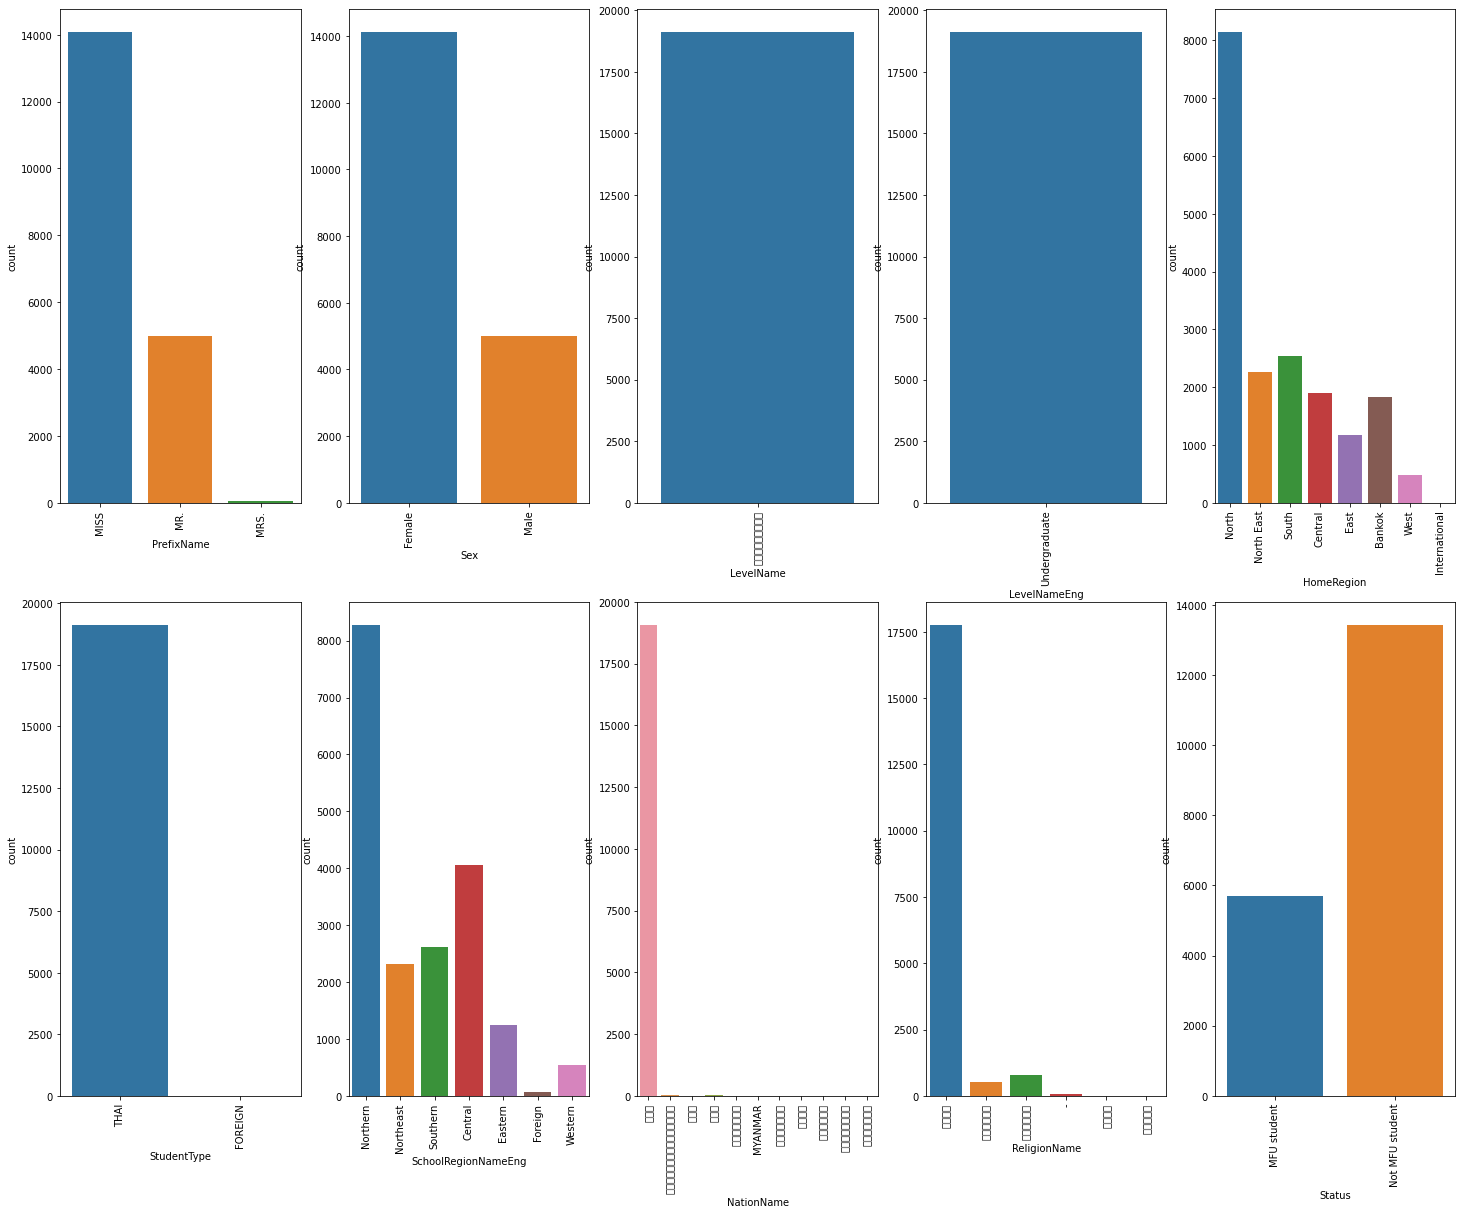

In [177]:
tcas_categorical_group_1 = ['PrefixName','Sex','LevelName','LevelNameEng','HomeRegion','StudentType','SchoolRegionNameEng','NationName','ReligionName','Status']
fig, ax = plt.subplots(2, 5, figsize=(30,20))
for i, subplot in zip(tcas_categorical_group_1, ax.flatten()):
        chart = sb.countplot(tcas_categorical_data[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

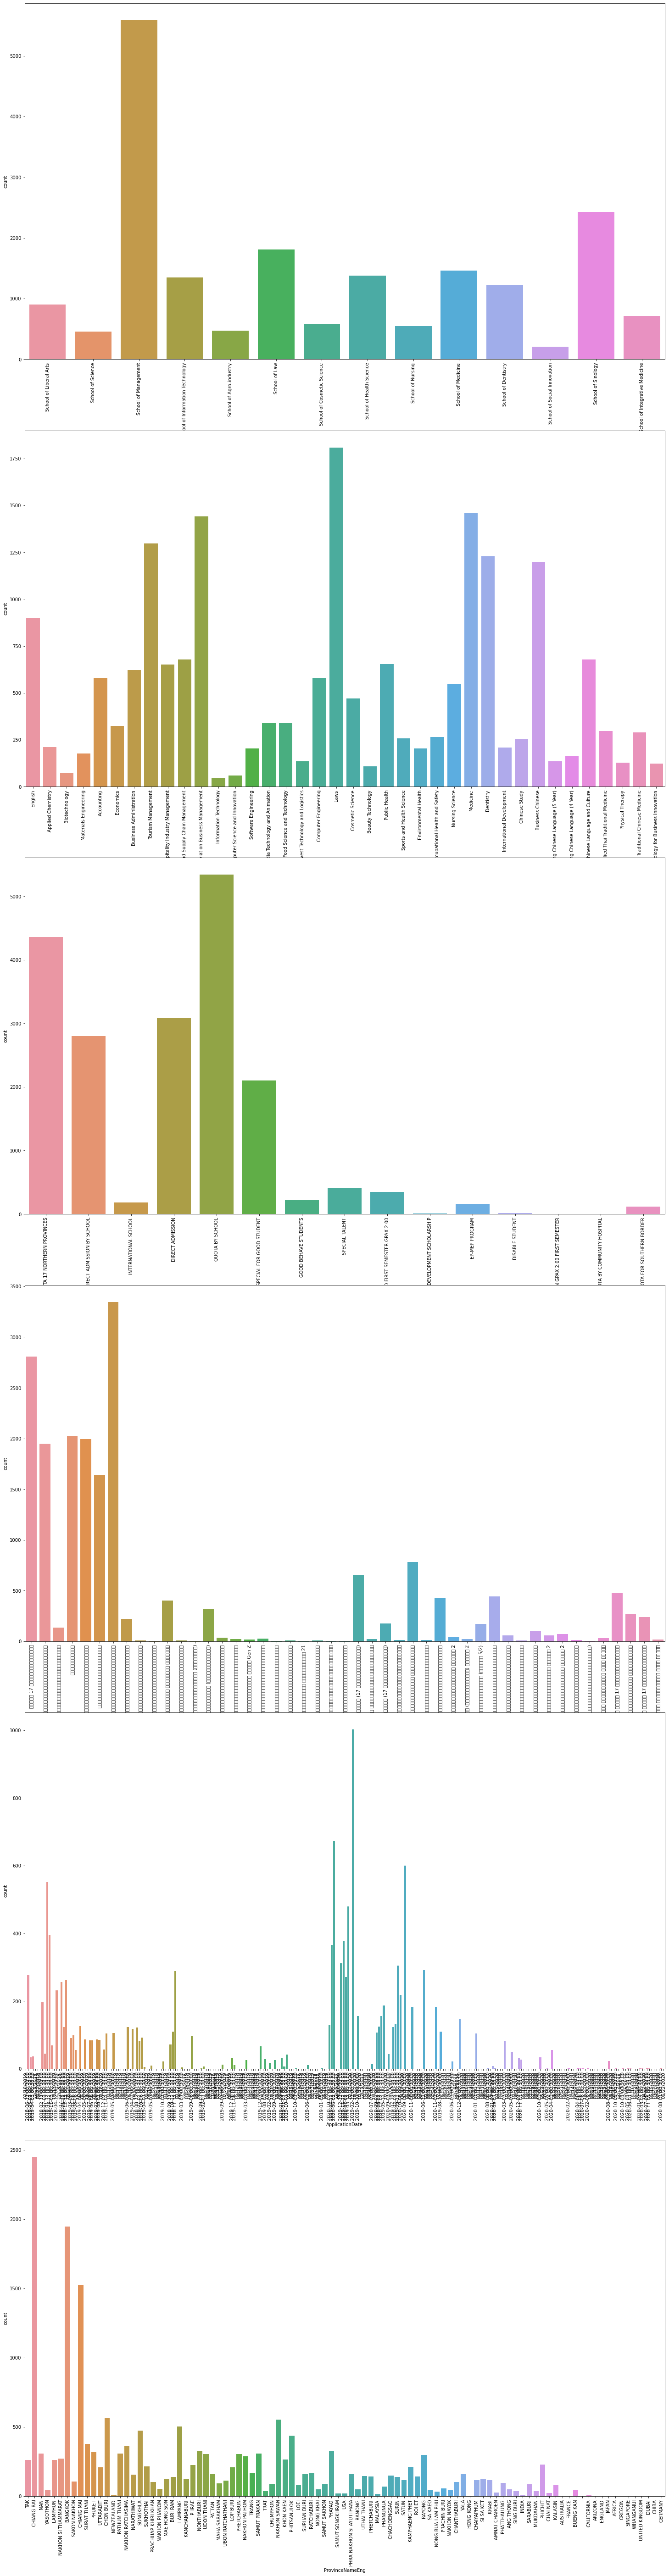

In [179]:
tcas_categorical_group_2 = ['FacultyName','DepartmentName','EntryTypeName','EntryGroupName','ApplicationDate','ProvinceNameEng']
fig, ax = plt.subplots(6, 1, figsize=(25,100))
for i, subplot in zip(tcas_categorical_group_2, ax.flatten()):
        chart = sb.countplot(tcas_categorical_data[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

### Numerical features

In [187]:
tcas_numerical_data = tcas_original_dataset.select_dtypes(include=['number'])
display(tcas_numerical_data.columns)
display(tcas_numerical_data.shape)

Index(['AcademicYear', 'AcademicSemester', 'FacultyID', 'DepartmentCode',
       'EntryTypeID', 'EntryGroupID', 'TCAS', 'LevelID', 'StudentTH', 'GPAX',
       'GPA_Eng', 'GPA_Math', 'GPA_Sci', 'GPA_Sco', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25',
       'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35',
       'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42'],
      dtype='object')

(19117, 56)

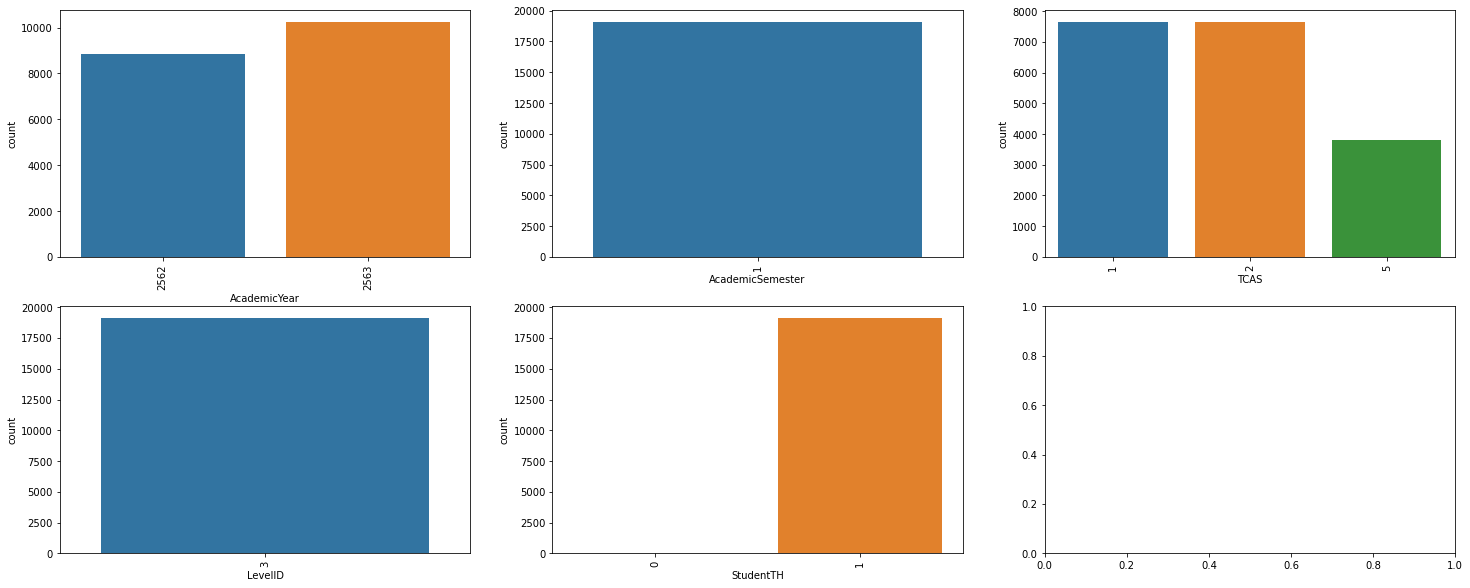

In [193]:
tcas_numerical_group_1 = ['AcademicYear','AcademicSemester','TCAS','LevelID','StudentTH']
fig, ax = plt.subplots(2, 3, figsize=(25,10))
for i, subplot in zip(tcas_numerical_group_1, ax.flatten()):
        chart = sb.countplot(tcas_numerical_data[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

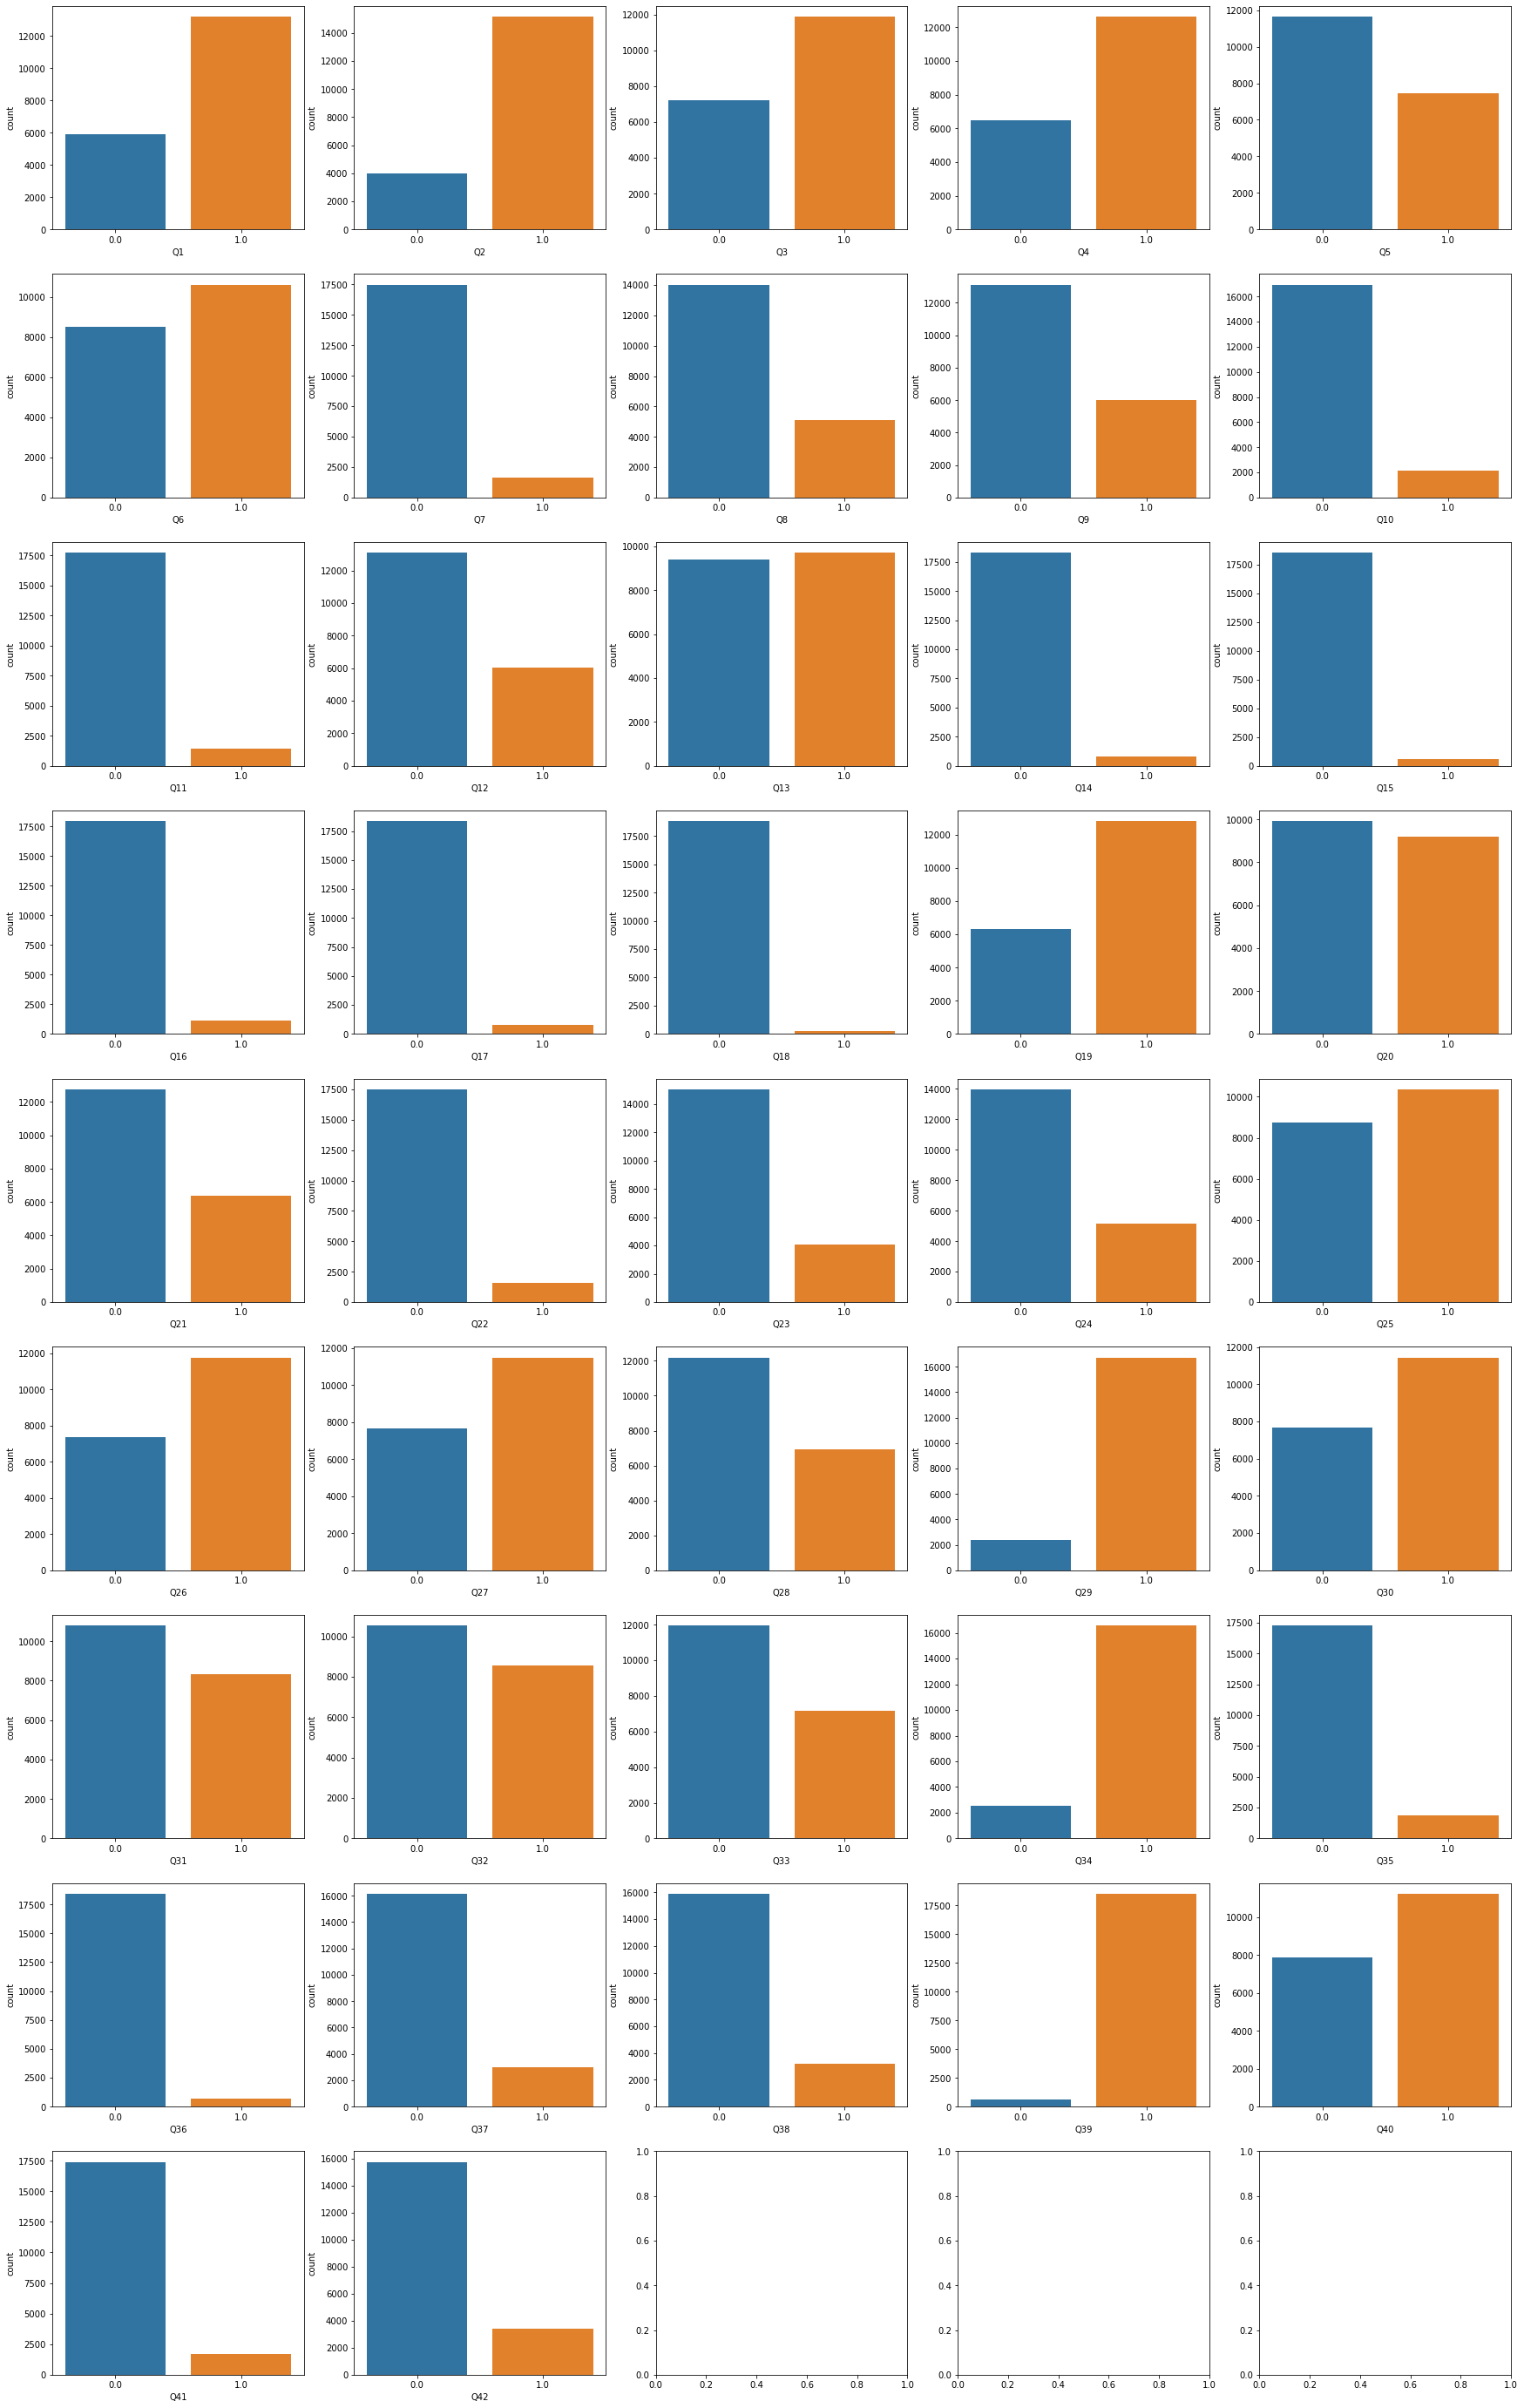

In [202]:
tcas_numerical_group_2 = ['Q1','Q2','Q3','Q4','Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15','Q16', 'Q17', 'Q18', 'Q19', 'Q20','Q21','Q22','Q23', 'Q24', 'Q25','Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35','Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42']
fig, ax = plt.subplots(9, 5, figsize=(30,50))
for i, subplot in zip(tcas_numerical_group_2, ax.flatten()):
        chart = sb.countplot(tcas_numerical_data[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

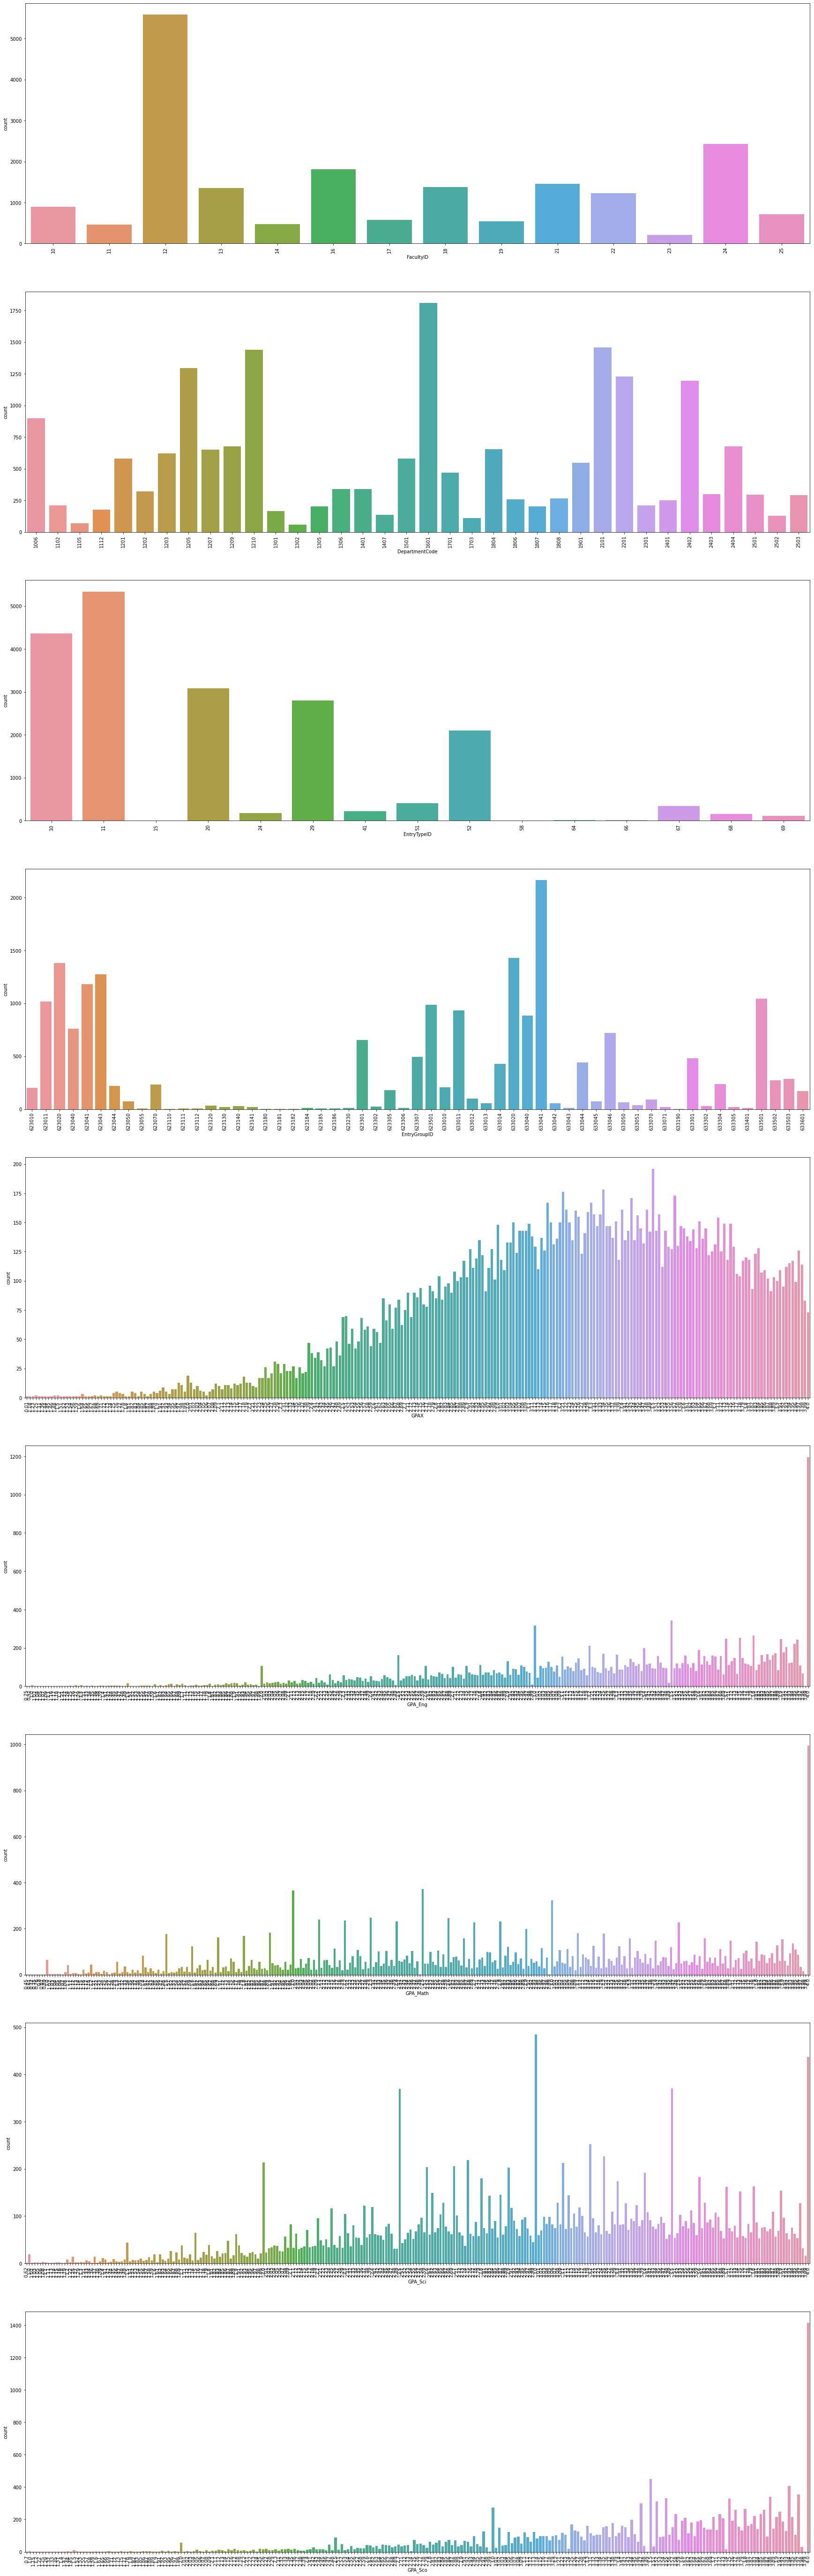

In [204]:
tcas_numerical_group_3 = ['FacultyID','DepartmentCode','EntryTypeID','EntryGroupID','GPAX','GPA_Eng','GPA_Math','GPA_Sci','GPA_Sco']
fig, ax = plt.subplots(9, 1, figsize=(30,100))
for i, subplot in zip(tcas_numerical_group_3, ax.flatten()):
        chart = sb.countplot(tcas_numerical_data[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)